In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.special import comb
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [3]:
def get_sequence_lengths():
    sequence_lengths = {"4": [], "5": [], "6": [], "7": []}
    
    for num in range(0, 128):
        seq = []
        for power in range(6, -1, -1):
            if num >= 2 ** power:
                seq.append(1)
                num -= 2 ** power
            else:
                seq.append(0)
    
        win_count = 0
        loss_count = 0
        length = 0

        for game in range(7):
            length += 1
            
            if seq[game] == 1:
                win_count += 1
            else:
                loss_count += 1
                
            if win_count == 4 or loss_count == 4:
                break
                
        sequence_lengths[str(length)].append(seq)
        
    return sequence_lengths
    
sequence_lengths = get_sequence_lengths()       

In [4]:
def expected_length(series, ph, pa):
    expected = 0
    count = 0
    for length in range(4, 8):        
        for seq in sequence_lengths[str(length)]:
            probability = 1
            for game in range(7):
                win = seq[game]
                if win == 1:
                    probability *= ph if series[game] == 1 else pa
                else:                    
                    probability *= (1 - ph) if series[game] == 1 else (1 - pa)
            expected += probability * length
            
    return expected

def seq_prob(seq, series, ph, pa):
    probability = 1
    for game in range(7):
        win = seq[game]
        if win == 1:
            probability *= ph if series[game] == 1 else pa
        else:
            probability *= (1 - ph) if series[game] == 1 else (1 - pa)
    return probability

In [5]:
def gen_grid(series, phs, pas):
    return [[expected_length(series, ph, pa) for pa in pas] for ph in phs]

In [14]:
phs = np.linspace(0, 1, 100)
pas = np.linspace(0, 1, 100)
x, y = np.meshgrid(phs, pas)

In [49]:
def plot(series, name):
    grid = np.array(gen_grid(series, phs, pas))
    

    fig = plt.figure(figsize=(12, 10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, grid, rstride=1, cstride=1,cmap='viridis', edgecolor='none', antialiased=True)
    

    # Add a color bar which maps values to colors.
    bar=fig.colorbar(surf, shrink=0.5, aspect=5)
    bar.set_label("Expected series length")
    plt.xlabel("Home win probability")
    plt.ylabel("Away win probability")
    ax.set_zlabel("Expected series length")
    plt.title(name + " Expected Series Length")
 
    # filename='images/2-2/' + str(angle)+'.png'
    # plt.savefig(filename, dpi=96)
    plt.gca()

    plt.show()

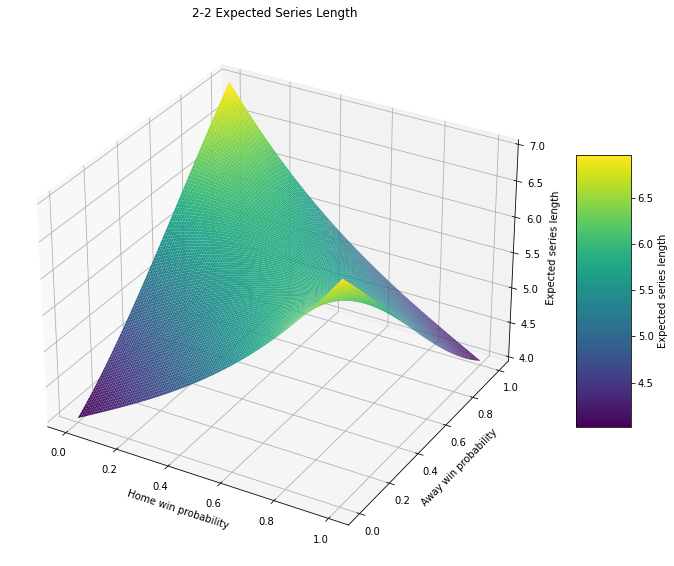

In [50]:
plot([1, 1, 0, 0, 1, 0, 1], "2-2")

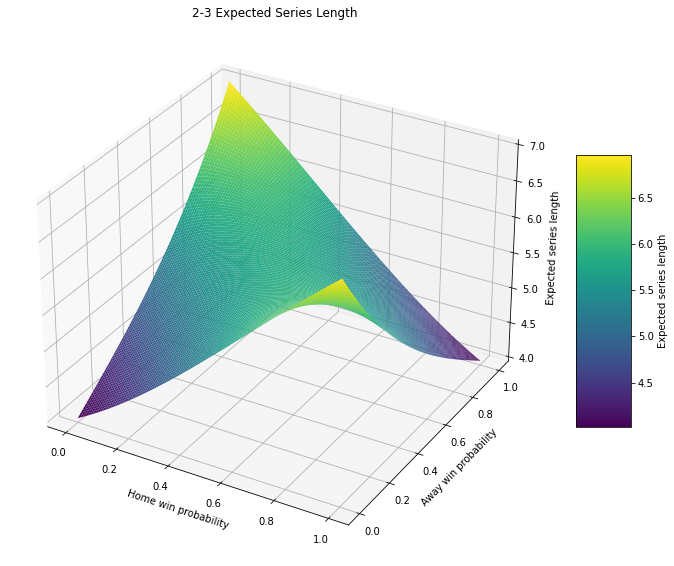

In [42]:
plot([1, 1, 0, 0, 0, 1, 1], "2-3")

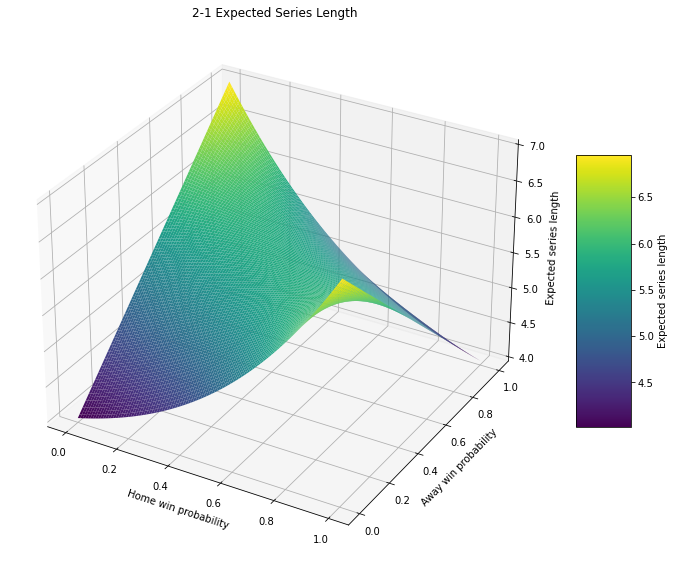

In [43]:
plot([1, 1, 0, 1, 0, 0, 1], "2-1")

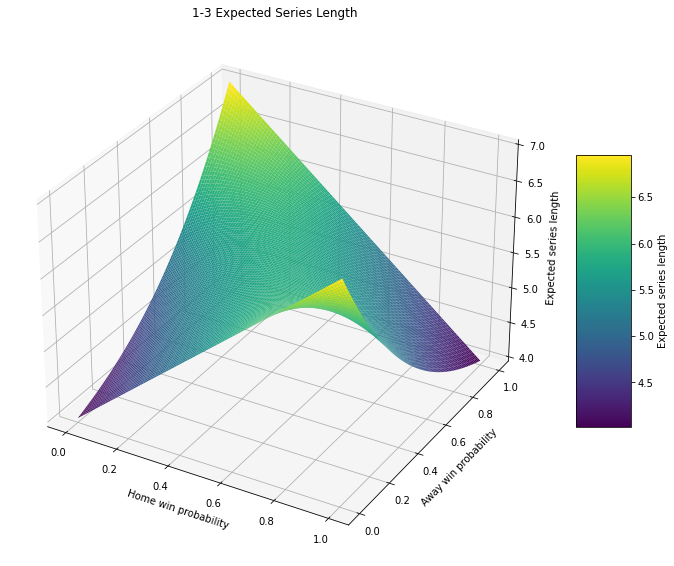

In [44]:
plot([1, 0, 0, 0, 1, 1, 1], "1-3")

In [36]:
def plot_all(series):
#     grid_2_2 = np.array(gen_grid([1, 1, 0, 0, 1, 0, 1], phs, pas))
    grid_2_3 = np.array(gen_grid([1, 1, 0, 0, 0, 1, 1], phs, pas))
    grid_2_1 = np.array(gen_grid([1, 1, 0, 1, 0, 0, 1], phs, pas))
#     grid_1_3 = np.array(gen_grid([1, 0, 0, 0, 1, 1, 1], phs, pas))   
 

    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
#     surf = ax.plot_surface(x, y, grid_2_2, rstride=1, cstride=1,cmap='Purples', edgecolor='none')
    surf = ax.plot_surface(x, y, grid_2_3, rstride=1, cstride=1,cmap='Blues', edgecolor='none')
    surf = ax.plot_surface(x, y, grid_2_1, rstride=1, cstride=1,cmap='Greens', edgecolor='none')
#     surf = ax.plot_surface(x, y, grid_1_3, rstride=1, cstride=1,cmap='Oranges', edgecolor='none')
    

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel("Home win probability")
    plt.ylabel("Away win probability")

    # filename='images/2-2/' + str(angle)+'.png'
    # plt.savefig(filename, dpi=96)
    plt.gca()

    plt.show()

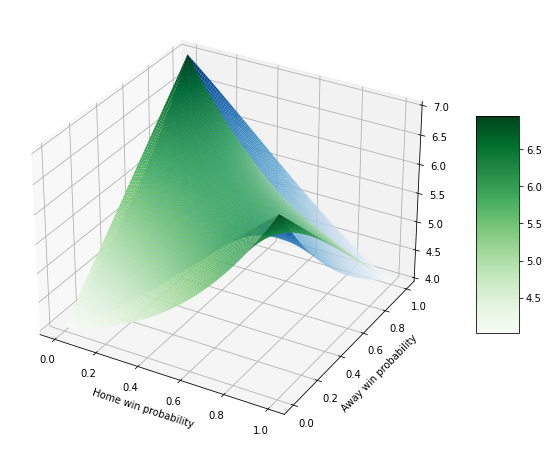

In [37]:
plot_all("hi")